# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

from pprint import pprint

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

582

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#response = requests.get(query_url + "Honolulu").json()
#pprint(response)
#response["coord"]["lat"]

In [4]:
data = []
i = 0
for city in cities:
    i = i + 1
    response = requests.get(query_url + city).json()
    try:
        temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]        
        wind_speed = response["wind"]["speed"]
        latitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        country = response["sys"]["country"]
        date = response["dt"]
        data.append([city, country, date, temp, humidity, cloudiness, wind_speed, latitude, longitude])
        #print(f"counter{i}  {city}")
        time.sleep(.2)
    except:
        print("City not found")


City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
data_df = pd.DataFrame(data, columns=["City", "Country", "Date", "Temp", "Humidity", "Cloudiness", "Wind Speed", "Latitude", "Longitude"])
data_df.to_csv("cities.csv", index = False)
data_df.head()

,City,Country,Date,Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,new norfolk,AU,1586627299,52.00,62,90,10.29,-42.78,147.06
1,luoyang,CN,1586627704,53.01,99,0,4.09,34.68,112.45
2,husavik,IS,1586627704,37.40,93,75,18.34,66.04,-17.34
3,saint george,US,1586627283,61.00,58,1,4.88,37.10,-113.58
4,mar del plata,AR,1586627146,73.00,60,40,14.99,-38.00,-57.56


In [6]:
#plt.scatter(data_df["latitude"],data_df["temp"])

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
date = time.strftime("%m/%d/%y")
date

'04/11/20'

This plot shows the relationship between the latitude of the city and the max temperature on a given date.  As expected, the temperature rises as you get closer to the equator.


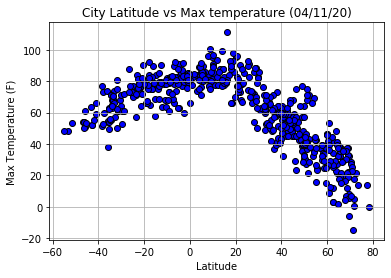

In [22]:
plt.scatter(data_df["Latitude"],data_df["Temp"], edgecolor = "black", c = "blue")
plt.title(f"City Latitude vs Max temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Latitude_v_MaxTemp.png", dpi = 150)
print(f"This plot shows the relationship between the latitude of the city and the max temperature on a given date.  As expected, the temperature rises as you get closer to the equator.")

#### Latitude vs. Humidity Plot

This plot shows the relationship between the latitude of the city and the humidity on a given date.  I don't see a relationship between the humidity and the distance of the city from the equator.


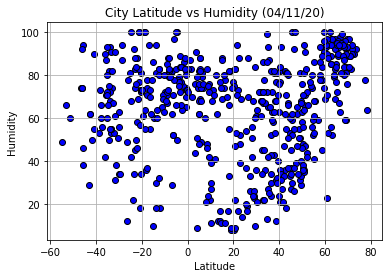

In [23]:
plt.scatter(data_df["Latitude"],data_df["Humidity"], edgecolor = "black", c = "blue")
plt.title(f"City Latitude vs Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("Latitude_v_Humidity.png", dpi = 150)
print(f"This plot shows the relationship between the latitude of the city and the humidity on a given date.  I don't see a relationship between the humidity and the distance of the city from the equator.")

#### Latitude vs. Cloudiness Plot

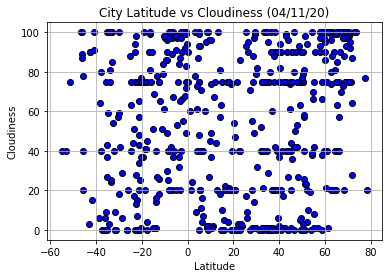

In [10]:
plt.scatter(data_df["Latitude"],data_df["Cloudiness"], edgecolor = "black", c = "blue")
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("Latitude_v_Cloudiness.png", dpi = 150)
print(f"This plot shows the relationship between the latitude of the city and the cloudiness on a given date.  I don't see a relationship between the cloudiness and the distance of the city from the equator.")

#### Latitude vs. Wind Speed Plot

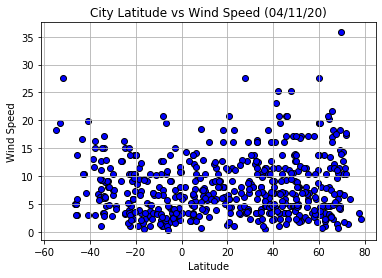

In [11]:
plt.scatter(data_df["Latitude"],data_df["Wind Speed"], edgecolor = "black", c = "blue")
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("Latitude_v_WindSpeed.png", dpi = 150)
print(f"This plot shows the relationship between the latitude of the city and the wind speed on a given date.  I don't see a relationship between the wind speed and the distance of the city from the equator.")

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def weather_regression(xvalues, yvalues, title, coordinates):
    (slope, intercept, rvalue, pvalue, standarderror) = linregress(xvalue, yvalue)
    regress_values = xvalues * slope + intercept
    line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(xvalue, yvalue)
    plt.plot(xvalues, regress_values, "r-")
    plt.annotate(line_equation, coordinates, fontsize = 10, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.show()

In [13]:
# Create Northern and Southern Hemisphere DataFrames
#data_df.head()
no_hemisphere_lat = data_df.loc[data_df["Latitude"]>=0]
so_hemisphere_lat = data_df.loc[data_df["Latitude"]<0]

Northern Hemisphere - Max Temp vs. Latitude Linear Regression

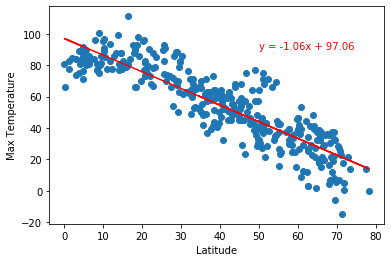

In [14]:
xvalue = no_hemisphere_lat["Latitude"]
yvalue = no_hemisphere_lat["Temp"]
weather_regression(xvalue, yvalue, "Max Temperature", (50, 90))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

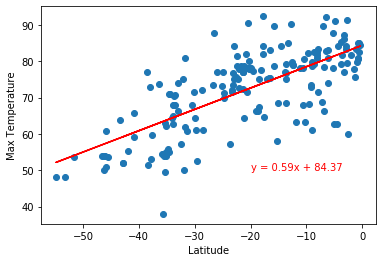

In [15]:
xvalue = so_hemisphere_lat["Latitude"]
yvalue = so_hemisphere_lat["Temp"]
weather_regression(xvalue, yvalue, "Max Temperature", (-20, 50))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

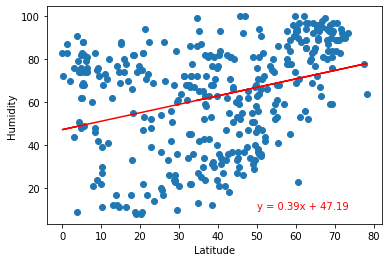

In [16]:
xvalue = no_hemisphere_lat["Latitude"]
yvalue = no_hemisphere_lat["Humidity"]
weather_regression(xvalue, yvalue, "Humidity", (50, 10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

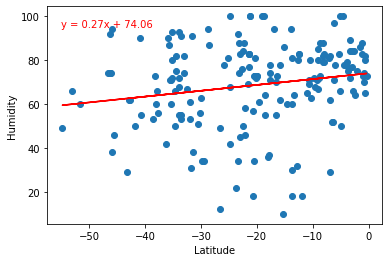

In [17]:
xvalue = so_hemisphere_lat["Latitude"]
yvalue = so_hemisphere_lat["Humidity"]
weather_regression(xvalue, yvalue, "Humidity", (-55, 95))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

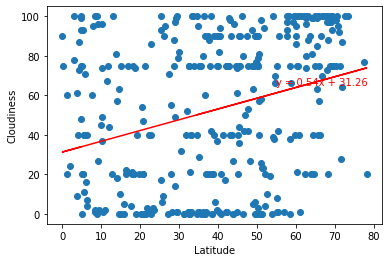

In [18]:
xvalue = no_hemisphere_lat["Latitude"]
yvalue = no_hemisphere_lat["Cloudiness"]
weather_regression(xvalue, yvalue, "Cloudiness", (55, 65))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

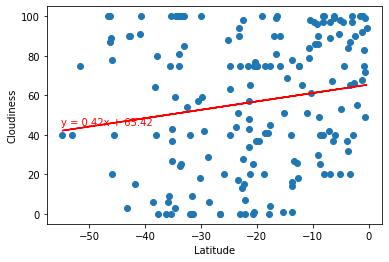

In [19]:
xvalue = so_hemisphere_lat["Latitude"]
yvalue = so_hemisphere_lat["Cloudiness"]
weather_regression(xvalue, yvalue, "Cloudiness", (-55, 45))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

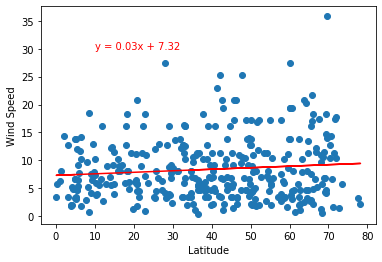

In [20]:
xvalue = no_hemisphere_lat["Latitude"]
yvalue = no_hemisphere_lat["Wind Speed"]
weather_regression(xvalue, yvalue, "Wind Speed", (10, 30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

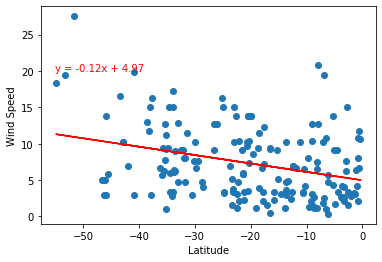

In [21]:
xvalue = so_hemisphere_lat["Latitude"]
yvalue = so_hemisphere_lat["Wind Speed"]
weather_regression(xvalue, yvalue, "Wind Speed", (-55, 20))